In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load and preview data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


Month
Nov    2861
Dec    1589
Name: count, dtype: int64


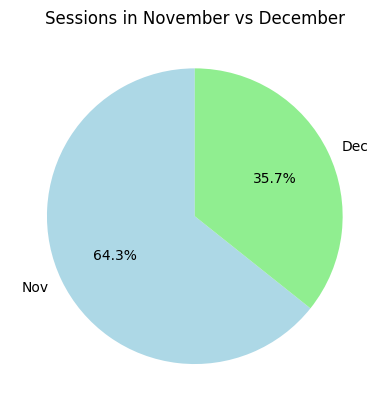

In [3]:
# Subset data for Nov and Dec
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Check months present
print(shopping_Nov_Dec['Month'].value_counts())

# Visual: Pie chart of session distribution
shopping_Nov_Dec['Month'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Sessions in November vs December")
plt.ylabel("")  # Hide y-label
plt.show()

In [4]:
# Count sessions by type and purchase
session_counts = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()

# Extract required numbers
total_new = np.sum(session_counts['New_Customer'])
total_returning = np.sum(session_counts['Returning_Customer'])
purch_new = session_counts[('New_Customer', 1)]
purch_returning = session_counts[('Returning_Customer', 1)]

# Calculate rates
rate_new = purch_new / total_new
rate_returning = purch_returning / total_returning
purchase_rates = {"Returning_Customer": rate_returning, "New_Customer": rate_new}
print(purchase_rates)

{'Returning_Customer': np.float64(0.1955937667920473), 'New_Customer': np.float64(0.2733516483516483)}


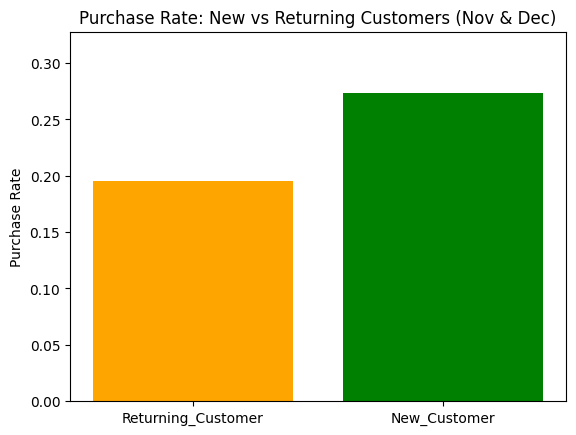

In [5]:
labels = list(purchase_rates.keys())
values = list(purchase_rates.values())

plt.bar(labels, values, color=["orange", "green"])
plt.ylabel("Purchase Rate")
plt.title("Purchase Rate: New vs Returning Customers (Nov & Dec)")
plt.ylim(0, max(values)*1.2)
plt.show()

In [6]:
# Select duration columns
duration_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Correlation matrix
corr_matrix = shopping_Nov_Dec[duration_cols].corr()
print(corr_matrix)

                         Administrative_Duration  Informational_Duration  \
Administrative_Duration                 1.000000                0.244689   
Informational_Duration                  0.244689                1.000000   
ProductRelated_Duration                 0.389855                0.367126   

                         ProductRelated_Duration  
Administrative_Duration                 0.389855  
Informational_Duration                  0.367126  
ProductRelated_Duration                 1.000000  


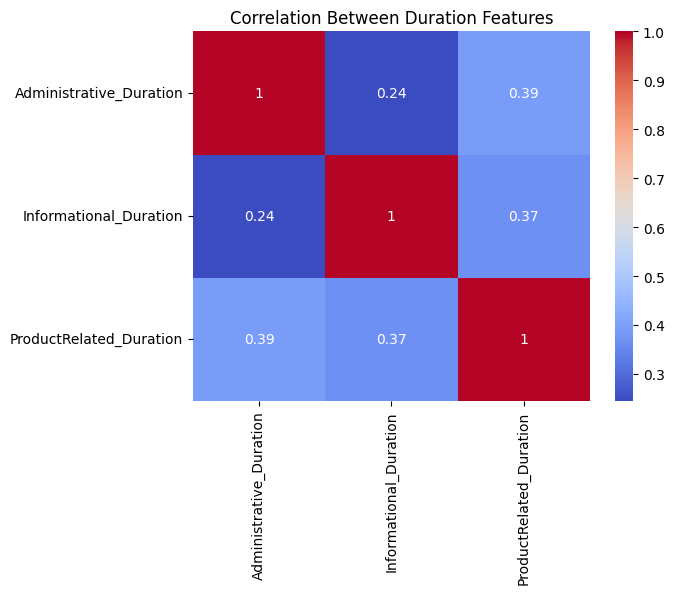

In [7]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Duration Features")
plt.show()

In [8]:
cor_admin_product = corr_matrix.loc['Administrative_Duration', 'ProductRelated_Duration']
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
#print(top_correlation)

print("the top correlation was among:", top_correlation )

the top correlation was among: {'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': np.float64(0.3898546003206953)}


In [9]:
# Boosted rate
boosted_rate = 1.15 * rate_returning
print("Boosted purchase rate:", boosted_rate)

# Binomial probability
prob_less_than_100 = stats.binom.cdf(k=99, n=500, p=boosted_rate)
prob_at_least_100 = 1 - prob_less_than_100
print("Probability of at least 100 sales:", round(prob_at_least_100, 3))

Boosted purchase rate: 0.22493283181085436
Probability of at least 100 sales: 0.919


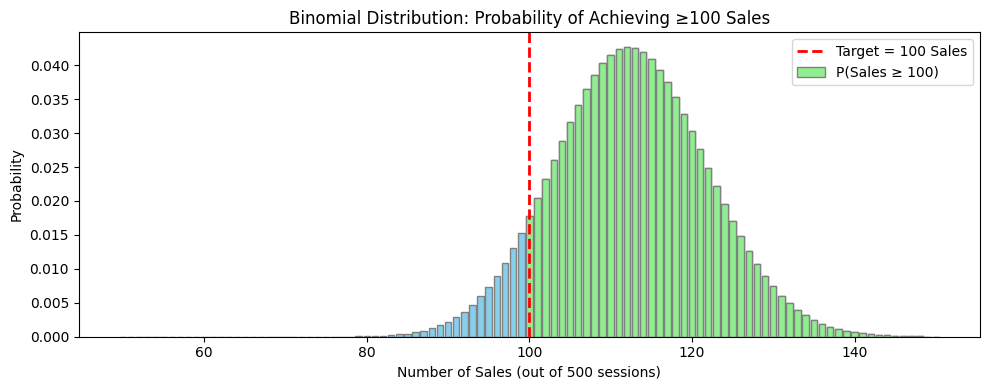

In [10]:
from matplotlib import patches

# Focused k values
k_vals = np.arange(500)
binom_probs = stats.binom.pmf(k_vals, 500, boosted_rate)

# Define the zoom range
zoom_range = (k_vals >= 50) & (k_vals <= 150)
success_range = (k_vals >= 100) & (k_vals <= 150)

plt.figure(figsize=(10, 4))

# Plot full bar chart in light blue
plt.bar(k_vals[zoom_range], np.array(binom_probs)[zoom_range], color='skyblue', edgecolor='gray')

# Shade area where sales ≥ 100 (success)
plt.bar(k_vals[success_range], np.array(binom_probs)[success_range], color='lightgreen', edgecolor='gray', label='P(Sales ≥ 100)')

# Add red dashed line at 100
plt.axvline(100, color='red', linestyle='dashed', linewidth=2, label='Target = 100 Sales')

# Labels & Title
plt.title("Binomial Distribution: Probability of Achieving ≥100 Sales")
plt.xlabel("Number of Sales (out of 500 sessions)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()
